In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit

In [ ]:
titanic = sns.load_dataset('titanic')


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [1]:
""" aynı cinsiyet grubuna ait 1. ve 3. sınıf ve yaşamıyor olan yolcuların
 bilet ücretlerini, yolculukta yalnız olup olmadıklarını, hangi şehirden olduklarına bakalım."""

titanic[
    (titanic.sex == 'female')
    & (titanic['class'].isin(['First', 'Third']))
    & (titanic.age > 30)
    & (titanic.survived == 0)
]

NameError: name 'titanic' is not defined

In [ ]:


# Datadan küçük bir parça çekelim, yaşadıkları şehir, şehirde yaşadıkları süre ve şehir yaşı bilgileri olsun
towns_dic = {
    'name': ['Southampton', 'Cherbourg', 'Queenstown', 'Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', 'Uruguay'],
    'population': [236900, 37121, 12347, 1305000],
    'age': [np.random.randint(500, 1000) for _ in range(4)]
}
towns_df = pd.DataFrame(towns_dic)

(titanic.merge(
  towns_df,
  left_on='embark_town', right_on='name',
  how='left',
  indicator=True,
  suffixes=('_passenger', '_city')
)).head()

,survived,pclass,sex,age_passenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,country,population,age_city,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Southampton,United Kingdom,236900.0,663.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Cherbourg,France,37121.0,659.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Southampton,United Kingdom,236900.0,663.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Southampton,United Kingdom,236900.0,663.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Southampton,United Kingdom,236900.0,663.0,both


<ipython-input-8-a690d2286a5e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.age.dropna())


AttributeError: module 'seaborn' has no attribute 'plt'

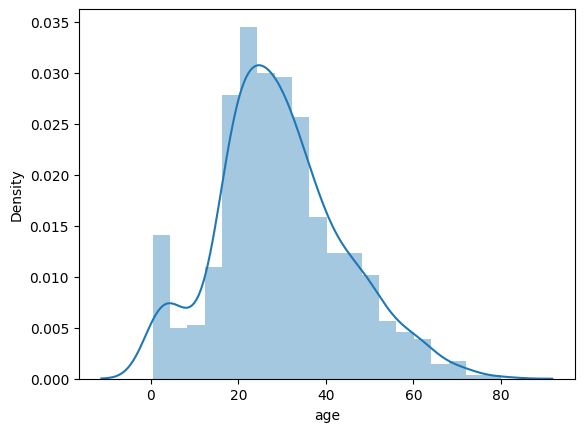

In [ ]:
#distplot: değişkenlerinizin dağılımıdır.

sns.distplot(titanic.age.dropna())
sns.plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

AttributeError: module 'seaborn' has no attribute 'plt'

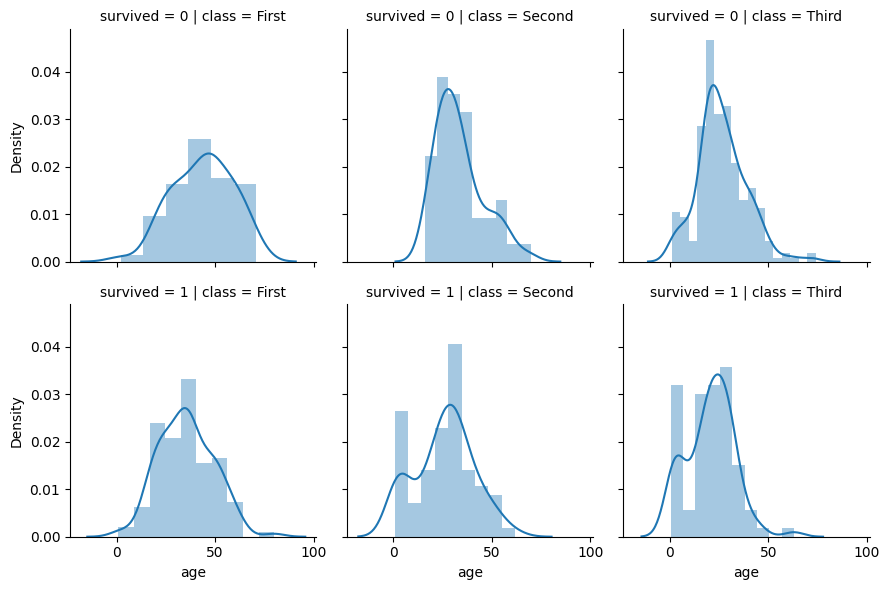

In [ ]:
"""FacetGrid: Bir grafiği (örneğin sonuncusu) bazı kategorilerden ayırmak isteyebiliriz"""

g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

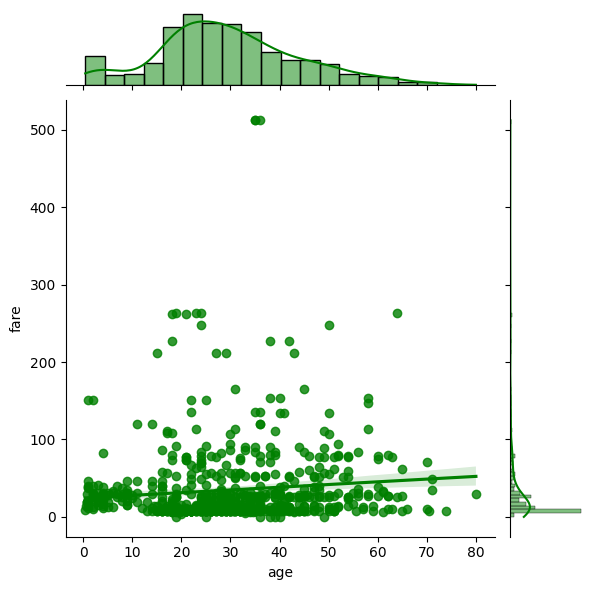

In [ ]:
"""**jointplot:** Bu metot, veri değişkenlerinin hem dağılımları hem de çekirdek yoğunluğu tahmin edicileri ve verilere uyan bir opsiyonel regresyon ile birlikte iki değişkene göre görüntülenmesi için kullanılır. **Reg** ile, verilere uygun bir regresyon istediğimizi belirtiyoruz.
Bu durumda, regresyonun gösterdiği yukarı doğru küçük bir eğilim olduğu görünse de, ***Pearson korelasyon katsayısı*** ile gösterildiği gibi *“yaş”* ve *“ücret”* değişkenleri arasında hemen hemen hiçbir ilişki yoktur.
"""

sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')
sns.plt.show()
